In [1]:
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from prettytable import PrettyTable
import pandas as pd

# Leemos el dataset
df = pd.read_csv('iris.csv')

# mezclamos los datos y seleccionamos el 70% para entrenamiento y el 30% para test
train, test = train_test_split(df, test_size=0.3, random_state=0)

# Generamos conjuntos de validación cruzada con k = 5
kf = KFold(n_splits=5)

# Inicializamos los clasificadores
gnb = GaussianNB()
mnb = MultinomialNB()

# Inicializamos las listas para guardar los resultados
gnb_scores = []
mnb_scores = []

# Iteramos sobre los conjuntos de validación cruzada
for train_index, test_index in kf.split(train):
    # Dividimos los datos en entrenamiento y test
    train_data = train.iloc[train_index]
    test_data = train.iloc[test_index]

    # Entrenamos los clasificadores
    gnb.fit(train_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], train_data['species'])
    mnb.fit(train_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], train_data['species'])

    # Predecimos los datos de test
    gnb_pred = gnb.predict(test_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
    mnb_pred = mnb.predict(test_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

    # Calculamos la precisión de los clasificadores
    gnb_scores.append(accuracy_score(test_data['species'], gnb_pred))
    mnb_scores.append(accuracy_score(test_data['species'], mnb_pred))

# Calculamos la precisión media de los clasificadores
gnb_mean = sum(gnb_scores) / len(gnb_scores)
mnb_mean = sum(mnb_scores) / len(mnb_scores)

# Mostramos los resultados en una tabla
table = PrettyTable()
table.field_names = ['Clasificador', 'Pliegue', 'Accuracy']
for i in range(5):
    table.add_row(['GaussianNB', i, gnb_scores[i]])
table.add_row(['GaussianNB', 'Media', gnb_mean])

table.add_row(['', '', ''])
for i in range(5):
    table.add_row(['MultinomialNB', i, mnb_scores[i]])
table.add_row(['MultinomialNB', 'Media', mnb_mean])

print(table) 

+---------------+---------+--------------------+
|  Clasificador | Pliegue |      Accuracy      |
+---------------+---------+--------------------+
|   GaussianNB  |    0    | 0.8571428571428571 |
|   GaussianNB  |    1    | 0.9523809523809523 |
|   GaussianNB  |    2    |        1.0         |
|   GaussianNB  |    3    |        1.0         |
|   GaussianNB  |    4    | 0.9047619047619048 |
|   GaussianNB  |  Media  | 0.9428571428571428 |
|               |         |                    |
| MultinomialNB |    0    | 0.5714285714285714 |
| MultinomialNB |    1    | 0.7142857142857143 |
| MultinomialNB |    2    | 0.9523809523809523 |
| MultinomialNB |    3    | 0.6666666666666666 |
| MultinomialNB |    4    | 0.5714285714285714 |
| MultinomialNB |  Media  | 0.6952380952380952 |
+---------------+---------+--------------------+


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      1.00      1.00        18
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



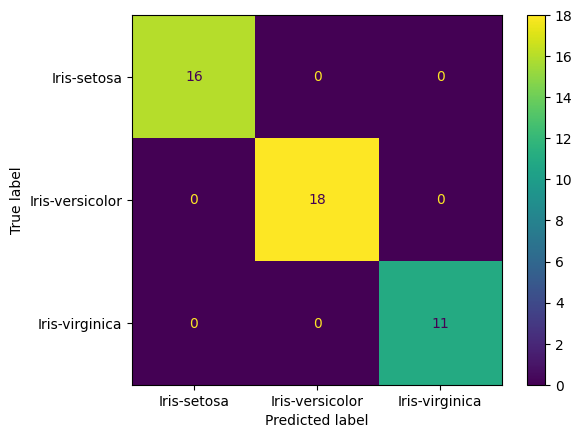

In [4]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Obtenemos la matriz de confusión de gaussianNB
train_data = train
test_data = test

gnb.fit(train_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], train_data['species'])

gnb_pred = gnb.predict(test_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

print(classification_report(test_data['species'], gnb_pred))

cm = confusion_matrix(test_data['species'], gnb_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_)
disp.plot()
plt.show()

In [8]:
# Calculamos el accuracy y lo mostramos en una tabla junto con el tipo de distribucion
accuaracy = accuracy_score(test_data['species'], gnb_pred)
table = PrettyTable()

table.field_names = ['Clasificador', 'Accuracy', 'Distribución']
table.add_row(['GaussianNB', accuaracy, 'Normal'])

print(table)

+--------------+----------+--------------+
| Clasificador | Accuracy | Distribución |
+--------------+----------+--------------+
|  GaussianNB  |   1.0    |    Normal    |
+--------------+----------+--------------+
